In [13]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from numbers import Number
from scipy import stats
import seaborn as sns
from scipy.stats import norm
import pickle
import statsmodels.api as sm

In [14]:
# load data 
data = pd.read_csv("data\kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [15]:
#Checking for outliers in 'price'
# Calculate Q1 and Q3
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# using a dynamic multiplier instead of using a fixed multiplier eg 1.5
lower_bound = q1 - (1.5 * iqr * (len(data['price'])/(len(data['price']) + 1)))
upper_bound = q3 + (1.5 * iqr * (len(data['price'])/(len(data['price']) + 1)))

# Identify the outliers
outliers = data['price'][(data['price'] < lower_bound) | (data['price'] > upper_bound)]

# Print the outliers
print(outliers.to_list())

# remove outliers from the data 
data['price'] = data['price'][~((data['price'] < lower_bound) | (data['price'] > upper_bound))]

price_length = len(data['price'])
print("Length of 'price' column after removing outliers:", price_length)



[1230000.0, 2000000.0, 1350000.0, 1330000.0, 1450000.0, 2250000.0, 1510000.0, 2400000.0, 2900000.0, 1370000.0, 2050000.0, 3080000.0, 2380000.0, 1380000.0, 1400000.0, 1350000.0, 1550000.0, 1300000.0, 1450000.0, 1200000.0, 1150000.0, 1390000.0, 1280000.0, 1200000.0, 1490000.0, 2250000.0, 1600000.0, 2130000.0, 1450000.0, 1950000.0, 1220000.0, 3070000.0, 1250000.0, 1150000.0, 1480000.0, 1580000.0, 1300000.0, 1310000.0, 2250000.0, 1360000.0, 1220000.0, 2400000.0, 1270000.0, 1200000.0, 1320000.0, 2450000.0, 1240000.0, 1570000.0, 1130000.0, 1200000.0, 1280000.0, 1960000.0, 1750000.0, 5110000.0, 1150000.0, 1880000.0, 1230000.0, 2300000.0, 2260000.0, 5300000.0, 1200000.0, 2200000.0, 1130000.0, 1180000.0, 1700000.0, 1400000.0, 2540000.0, 1360000.0, 1230000.0, 5350000.0, 1330000.0, 1220000.0, 1250000.0, 1300000.0, 1180000.0, 1380000.0, 1150000.0, 1200000.0, 2250000.0, 1230000.0, 1270000.0, 1680000.0, 1930000.0, 1180000.0, 2350000.0, 1140000.0, 1320000.0, 1430000.0, 1530000.0, 1570000.0, 1130000.0

In [16]:
#Checking for outliers in 'sqft_living'
# Calculate Q1 and Q3
q1 = data['sqft_above'].quantile(0.25)
q3 = data['sqft_above'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# using a dynamic multiplier instead of using a fixed multiplier eg 1.5
lower_bound = q1 - (1.5 * iqr * (len(data['sqft_above'])/(len(data['sqft_above']) + 1)))
upper_bound = q3 + (1.5 * iqr * (len(data['sqft_living'])/(len(data['sqft_above']) + 1)))

# Identify the outliers
outliers = data['sqft_above'][(data['sqft_above'] < lower_bound) | (data['sqft_above'] > upper_bound)]

# Print the outliers
print(outliers.to_list())

# remove outliers from the data 
data['sqft_above'] = data['sqft_above'][~((data['sqft_above'] < lower_bound) | (data['sqft_above'] > upper_bound))]

sqft_living_length = len(data['sqft_above'])
print("Length of 'price' column after removing outliers:", sqft_living_length )

[3890, 3760, 4750, 5310, 3840, 6070, 4040, 3840, 4860, 3860, 4030, 4410, 6050, 4740, 5403, 4120, 4150, 4370, 4570, 4670, 4230, 4270, 5670, 4475, 6070, 4300, 3990, 5990, 4460, 4190, 4250, 4930, 3840, 5000, 5320, 6720, 4210, 3890, 3830, 5153, 4210, 4740, 5450, 4280, 3880, 4570, 3750, 4130, 5710, 4700, 3810, 4490, 4150, 4070, 3840, 5770, 4030, 3810, 4490, 3840, 4360, 3960, 4460, 4340, 3850, 4750, 4350, 4160, 5180, 4070, 5130, 6350, 3770, 3780, 4750, 3950, 3915, 3880, 4870, 4030, 4740, 3850, 4860, 4310, 3930, 4070, 4080, 5400, 6110, 3859, 4600, 3940, 3800, 4230, 4070, 5050, 4000, 4220, 3740, 3860, 3890, 3890, 5230, 5370, 4140, 4270, 4430, 4210, 4130, 3780, 4610, 7680, 4250, 3820, 4120, 3770, 4610, 5080, 4140, 4340, 3770, 5760, 4390, 4000, 3810, 4400, 6200, 4320, 4380, 4040, 4580, 4180, 3740, 4240, 4070, 3740, 6110, 4115, 3780, 3830, 3780, 5830, 4140, 3920, 3930, 5990, 5070, 3910, 3810, 4020, 3830, 3880, 3810, 4130, 4750, 4060, 4060, 4890, 3820, 4160, 4020, 4090, 3990, 4560, 4570, 3760, 406

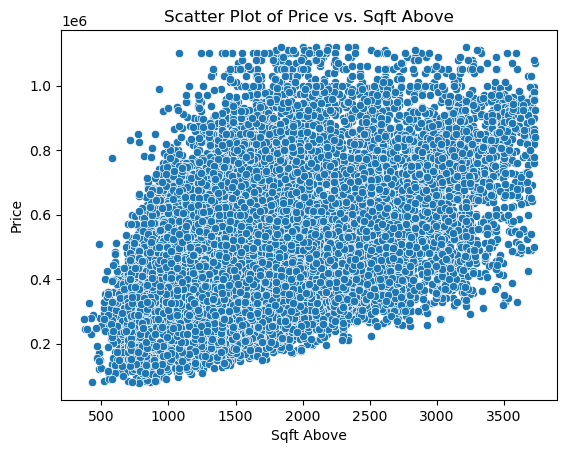

In [17]:
# Checking for linearity 
# Create scatter plot
sns.scatterplot(data=data, x='sqft_above', y='price')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Sqft Above')
plt.show()

In [18]:


# Calculating for slope and intercept
def find_slope_intercept(X, y):
    """Simple function to get the intercept and slope"""
    # Remove NaN values
    valid_indices = np.logical_and(np.isfinite(X), np.isfinite(y))
    X_valid = X[valid_indices]
    y_valid = y[valid_indices]

    # number of observations
    n = np.size(X_valid)

    # mean of X and y
    x_mean = np.mean(X_valid)
    y_mean = np.mean(y_valid)

    # calculate the cross-deviation
    SS_xy = np.sum(y_valid * X_valid) - (n * y_mean * x_mean)
    # calculating the deviation about X
    SS_xx = np.sum(X_valid * X_valid) - (n * x_mean * x_mean)

    # calculate the regression coefficients 
    slope = SS_xy / SS_xx
    intercept = y_mean - (slope * x_mean)

    return (slope, intercept)

# Call the function with 'sqft_living' as X and 'price' as y
slope, intercept = find_slope_intercept(data["sqft_above"], data["price"])
print("Slope:", slope)
print("Intercept:", intercept)



Slope: 148.8110825619169
Intercept: 221862.15423927267


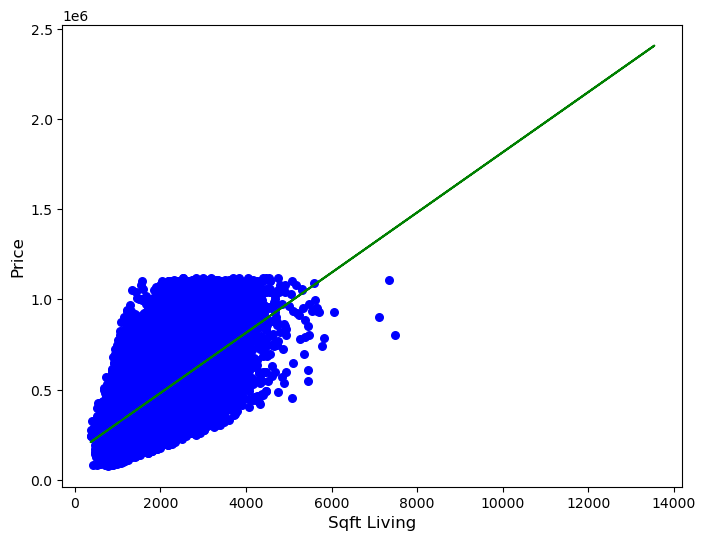

In [19]:

# Plot linear regression line
def plot_regression_line(X, y, b):
    """Simple function that draws the regression line"""
    # plot using a scatter plot
    fig, ax = plt.subplots(figsize=(8, 6))

    plt.scatter(X, y, color="b", s=30)

    # predict dependent variable 
    y_pred = b[1] + b[0] * X

    # plot regression line
    plt.plot(X, y_pred, color='g')

    # label 
    plt.xlabel("Sqft Living", fontsize=12)
    plt.ylabel("Price", fontsize=12)

    plt.show()

# Call the function with 'sqft_living' as X, 'price' as y, and the slope-intercept values 'b'
b = find_slope_intercept(data["sqft_living"], data["price"])
plot_regression_line(data["sqft_living"], data["price"], b)


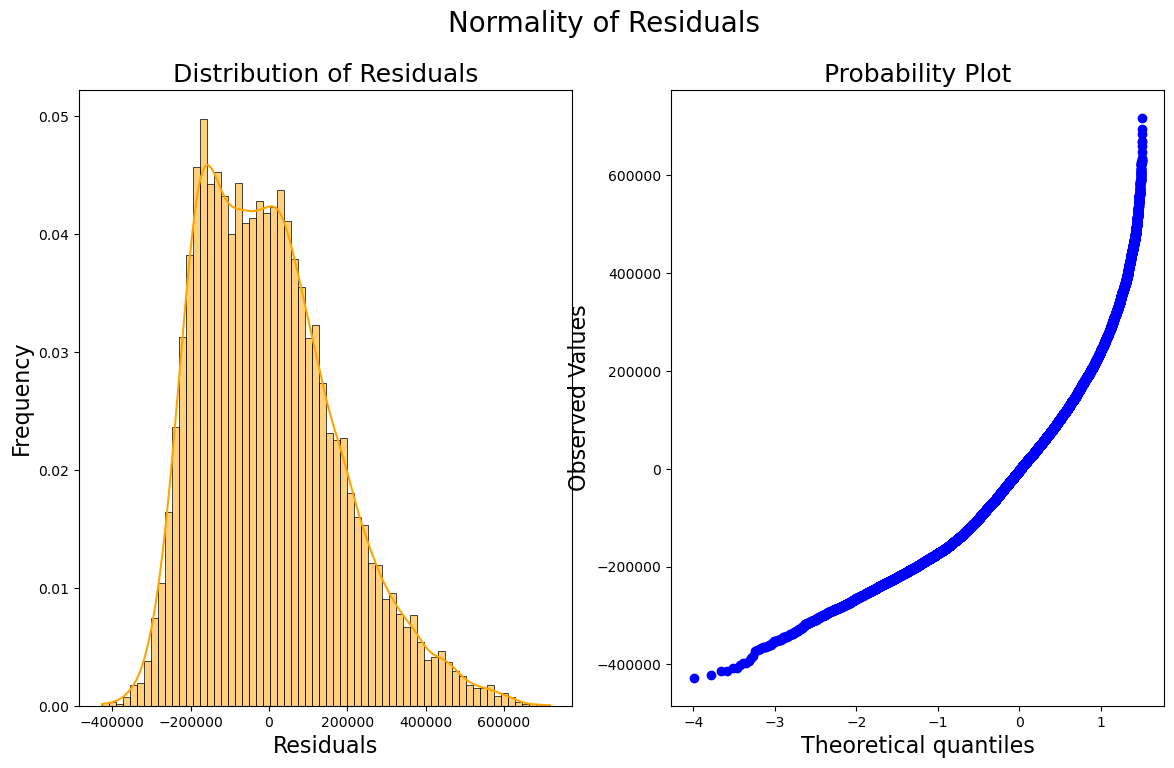

In [20]:


# Calculate the residuals for the linear regression model
data["residuals"] = data["price"] - (intercept + slope * data["sqft_above"])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Histogram of residuals
sns.histplot(data["residuals"], stat='frequency', color="orange", kde=True, ax=ax[0])
ax[0].set_ylabel("Frequency", fontsize=16)
ax[0].set_xlabel("Residuals", fontsize=16)
ax[0].set_title("Distribution of Residuals", fontsize=18)

# Q-Q plot of residuals
stats.probplot(data["residuals"], plot=ax[1])
ax[1].set_ylabel("Observed Values", fontsize=16)
ax[1].set_xlabel("Theoretical quantiles", fontsize=16)
ax[1].set_title("Probability Plot", fontsize=18)

fig.suptitle("Normality of Residuals", fontsize=20)

plt.show()


In [21]:
# using shapiro-wilk test 
stat, p = stats.shapiro(data["residuals"])
print(f"statistic = {np.round(stat,3)}, p-value = {np.round(p,3)}")
alpha = 0.05
if p > alpha:
    print("Fail to reject the null hypothesis and conclude that residuals are normally distributed.")
else:
    print("Reject the null hypothesis and conclude that residuals are not normally distributed.")

statistic = nan, p-value = 1.0
Fail to reject the null hypothesis and conclude that residuals are normally distributed.


c:\Users\PC\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


KeyError: 'Predicted'

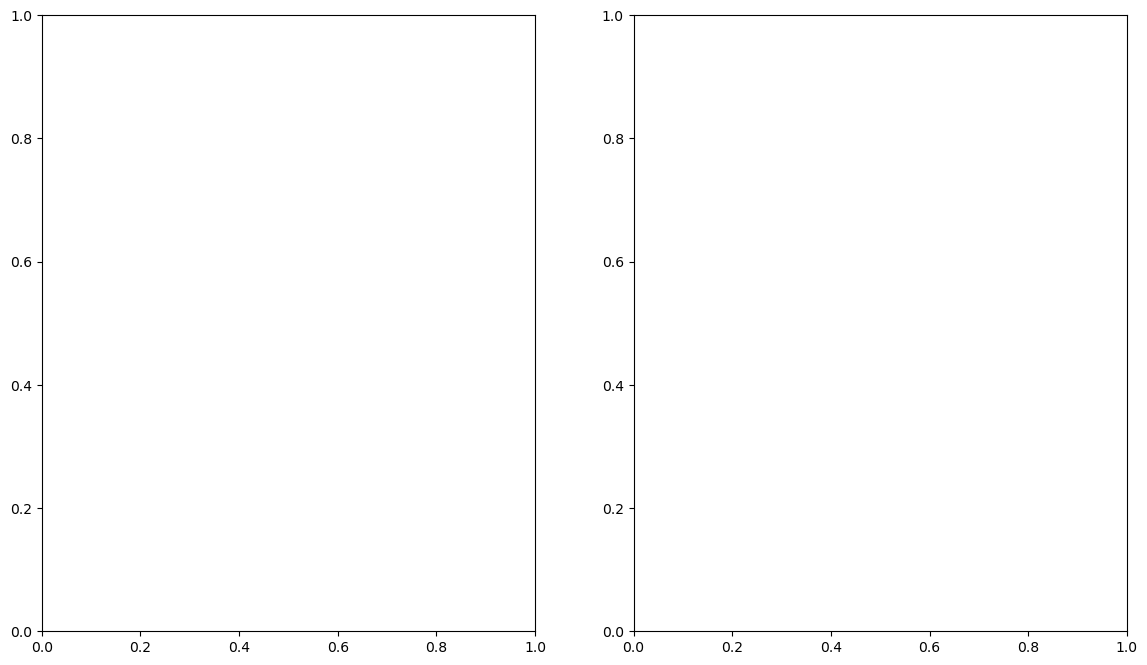

In [22]:
#checking for independence for Observations 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Residuals vs Predicted Values
sns.scatterplot(x=data["Predicted"], y=data["residuals"], color="orange", ax=ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_ylabel("Residuals", fontsize=16)
ax[0].set_xlabel("Predicted Values", fontsize=16)
ax[0].set_title("Residuals vs Predicted Values", fontsize=18)

# Residuals vs Independent Variable
sns.scatterplot(x=data["sqft_living"], y=data["residuals"], color="blue", ax=ax[1])
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set_ylabel("Residuals", fontsize=16)
ax[1].set_xlabel("X (Independent Variable)", fontsize=16)
ax[1].set_title("Residuals vs Independent Variable", fontsize=18)

fig.suptitle("Independence of Observations", fontsize=20)

plt.show()


In [ ]:


# Drop rows with missing values from residuals
residuals_without_missing = data["residuals"].dropna()

# Perform the Durbin-Watson test on residuals without missing values
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals_without_missing)

print("Durbin-Watson statistic:", durbin_watson_statistic)


Durbin-Watson statistic: 1.9682079734742604


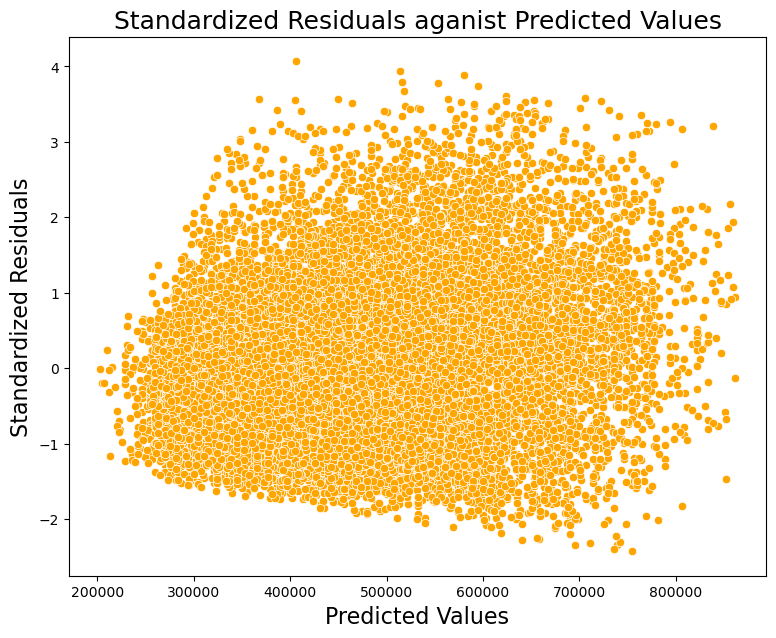

In [ ]:
# Checking for Homoscedasticity
# calculate the mean and standard deviation of residuals
residuals_mean = np.mean(data["residuals"])
residuals_std = np.std(data["residuals"], ddof=1) # ddof = 1 compute the unbiased sample standard deviation

# calculate the standardized residuals
data["std_resid"] = data["residuals"] / residuals_std

# visualize
fig, ax = plt.subplots(figsize=(9,7))

sns.scatterplot(x=data["Predicted"], y=data["std_resid"], color="orange", ax=ax)
ax.set_ylabel("Standardized Residuals", fontsize=16)
ax.set_xlabel("Predicted Values", fontsize=16)
ax.set_title("Standardized Residuals aganist Predicted Values", fontsize=18)

plt.show()